In [75]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
from scipy import stats, integrate
import statsmodels
from sklearn.neighbors import KernelDensity

from matplotlib import pyplot as plot
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster


#clustering starts here

In [76]:
#reads the age counts
file_in=open('sums.txt','r');
sums=np.zeros([1569,1]);
_idx=0;
for i in file_in.readlines():
    sp=i.split(',')
    sums[_idx]=[float(i.strip('\n')) for i in sp[1:]]
    _idx+=1;

In [77]:
#reads the age counts
file_in=open('kde_age_distributions.txt','r');
kde_dict_age_distribution={};
dic_idx={};
rv_dic_idx={};
idx=0;

for i in file_in.readlines():
    sp=i.split(',');
    kde_dict_age_distribution[sp[0]]=[float(i.strip('\n')) for i in sp[1:]]
    dic_idx[sp[0]]=idx;
    rv_dic_idx[idx]=sp[0];
    idx+=1;
    
age_distrub=np.zeros([len(kde_dict_age_distribution.keys()),100]);
for i in dic_idx:
    age_distrub[dic_idx[i]]=kde_dict_age_distribution[i];


In [78]:
#filtering the age_distrib before clustering
cnt_thr=1500;
age_distrub_filtered=age_distrub[[_[0] for _ in sums>cnt_thr],:];
sums_filtered=sums[[_[0] for _ in sums>cnt_thr],:];
dic_idx_filtered={};
idx=0;
idx_2=0;
for i in sums>cnt_thr:
    if i==True:
        dic_idx_filtered[idx_2]=rv_dic_idx[idx];
        idx_2+=1;
    idx+=1;
rev_dic_idx_filtered={dic_idx_filtered[_]:_ for _ in dic_idx_filtered};

print ('the new shape is ', age_distrub_filtered.shape)

the new shape is  (278, 100)


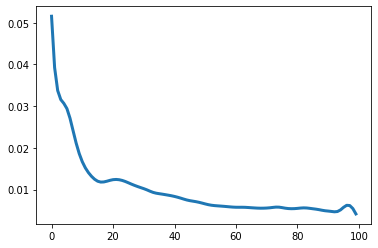

In [79]:
plt.plot(age_distrub_filtered[3])

In [80]:
# generate the linkage matrix
Z = linkage(age_distrub_filtered, method='ward',metric='euclidean')

In [81]:
#read code discreptions
detailed_name={};
file_in=open('CID-10cats_.csv','r', encoding = "ISO-8859-1")
print(file_in.readline())
for i in file_in.readlines():
    sp=i.split(',');
    detailed_name[sp[0]]=sp[3].replace('"','');

CAT,to_group,CLASSIF,DESCRIPTION,DESCRABREV,DESCRABREV,REFER,DESCRICAO,EXCLUIDOS



In [82]:
def leaf_label(id):
    id=int(id);
    n=len(label_list);
    if id<n:
        return str(label_list[id]) +' - '+ detailed_name[label_list[id]]+ ',  (' + str(sums_filtered[id][0]) + ')';
    else:
        a=leaf_label(Z[id-n,0]); 
        b=leaf_label(Z[id-n,1]); 
        if float(a.split(',')[1].replace('(','').replace(')',''))>float(b.split(',')[1].replace('(','').replace(')','')):
            return a
        else:
            return b

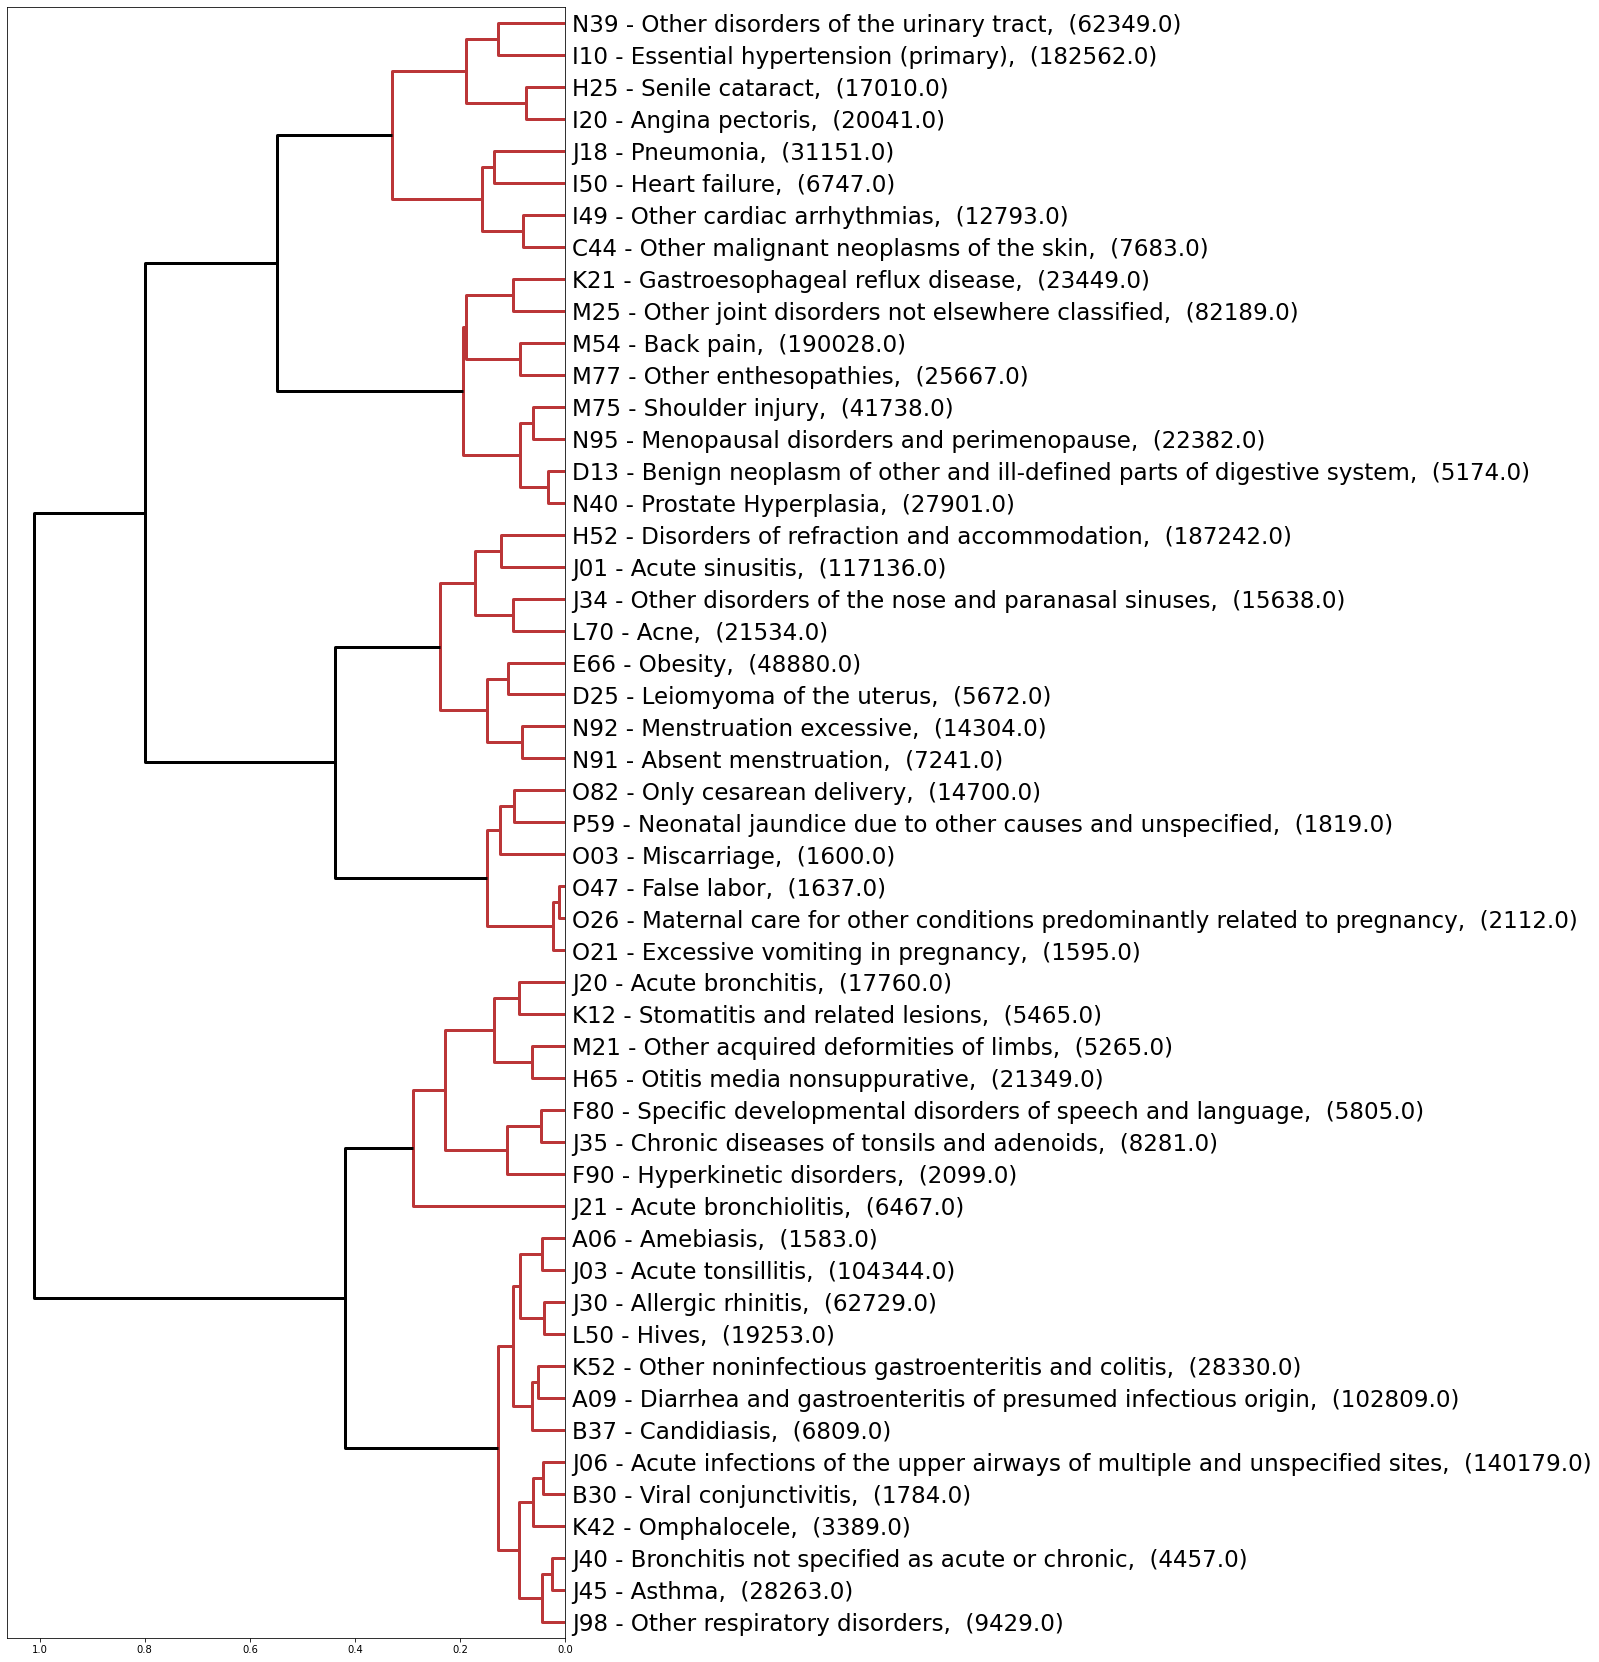

In [83]:
fig=plt.figure(figsize=(10,30))
ax = fig.add_subplot(111)
ax.xaxis.tick_bottom();
label_list=[dic_idx_filtered[i] for i in dic_idx_filtered];
color = ["k"]*(2*1000-1)
for i in range(0,550):
    color[i]='#bb3638'
plt.rc('axes',edgecolor='w')
plt.rcParams['lines.linewidth'] = 3
a=dendrogram(Z,orientation='left',leaf_label_func=leaf_label,leaf_font_size=23,color_threshold=0.4,p=5,truncate_mode='level',link_color_func=lambda x: color[x])  # font size for the x axis labels
#plt.savefig('dendogram.pdf', bbox_inches='tight')

clusters=fcluster(Z,6,criterion='maxclust')

In [84]:
set(clusters)

{1, 2, 3, 4, 5, 6}

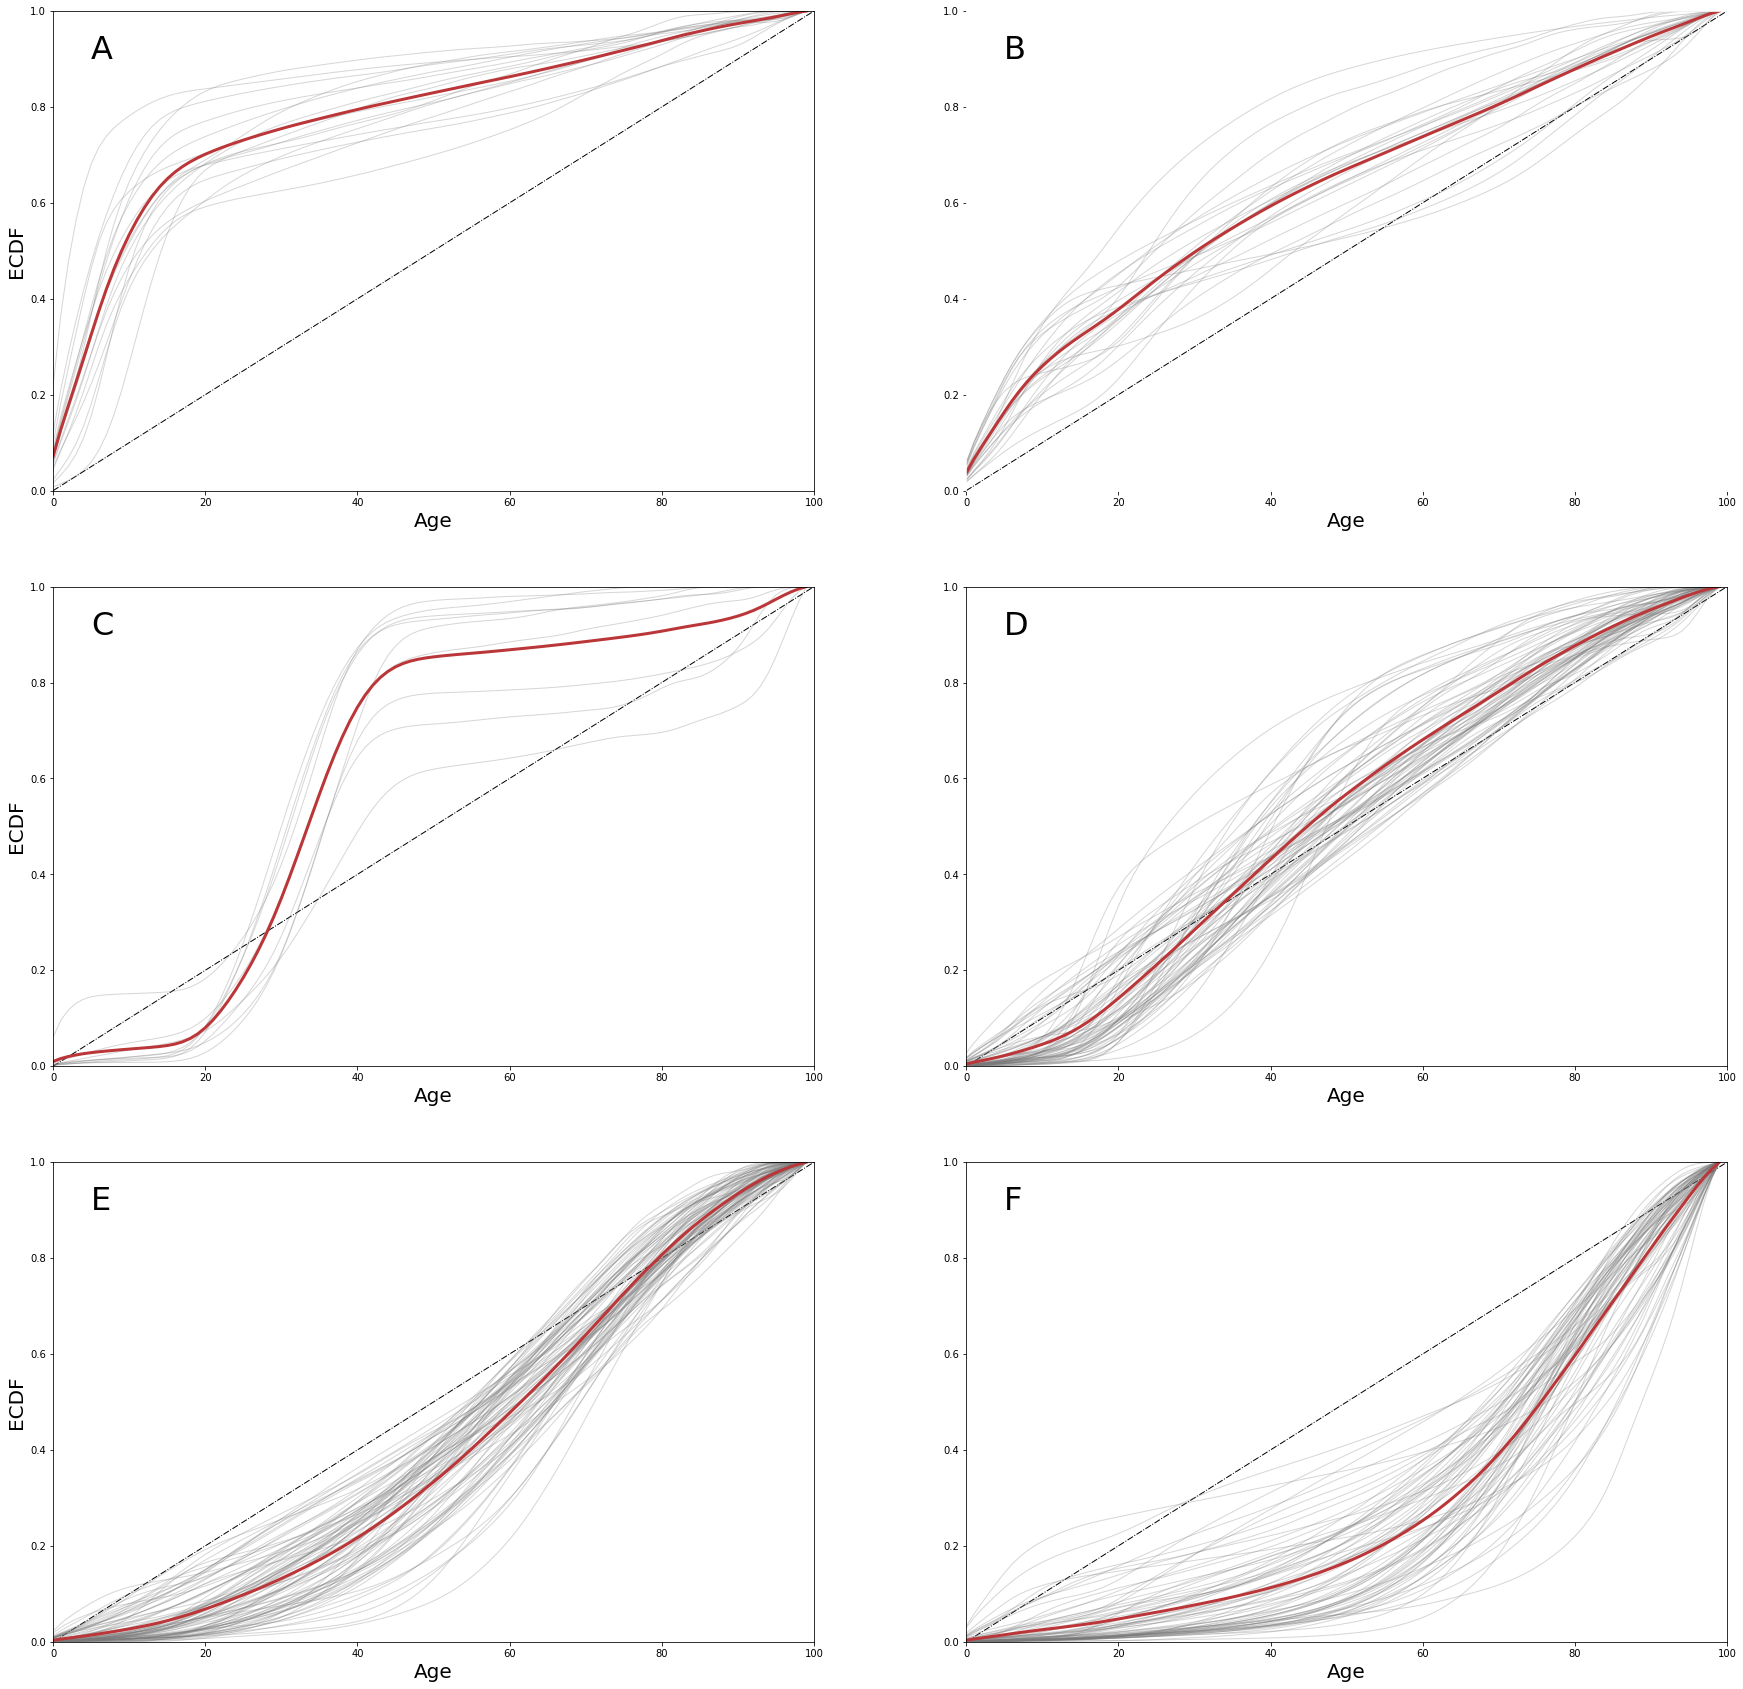

In [85]:
fig = plt.figure(figsize=(30,30))
Letters = ['A','B','C','D','E','F']
#for i in set(clusters):
for i in set(clusters):
    #To order them based on the previous paper
    if i == 2:
        ax = fig.add_subplot(3,2,1)
        letter = Letters[1 - 1]
        ax.set_ylabel('ECDF',fontsize=20)
    elif i == 1:
        ax = fig.add_subplot(3,2,2)
        letter = Letters[2 - 1]
    else:
        
        ax = fig.add_subplot(3,2,i)
        letter = Letters[i - 1]
        if i % 2 != 0:
            ax.set_ylabel('ECDF',fontsize=20)
        
    plt.rc('axes',edgecolor='k')
    avg=[];
    ax.plot(np.linspace(0,100,50),np.linspace(0,1,50),'k-.',linewidth=1)
    for j in age_distrub_filtered[clusters==i,:]:
        #plt.hold(True)
        ax.plot(np.cumsum(j),'#79797a',alpha=0.3,linewidth=1);
        avg.append(np.cumsum(j))
    ax.plot(np.mean(avg,0),'#bb3638',linewidth=3)
    ax.set_ylim([0,1])
    ax.set_xlim([0,100])
    
    
    ax.set_xlabel('Age',fontsize=20)
    ax.text(5,0.9,letter,fontsize=32)
    
plt.savefig('Figure4.pdf',dpi=300,bbox_inches='tight')

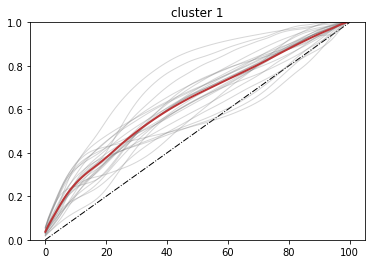

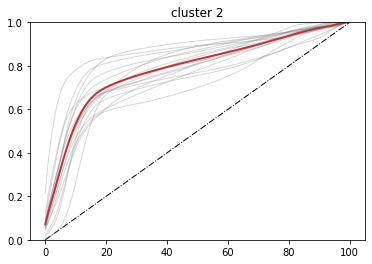

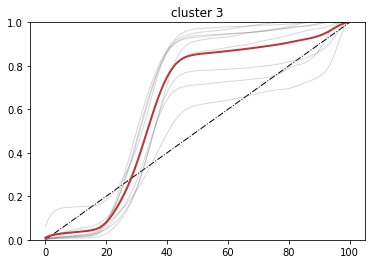

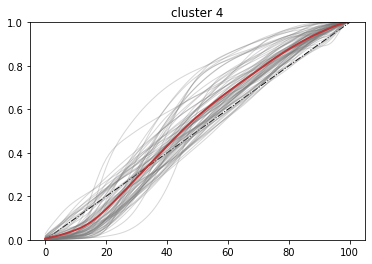

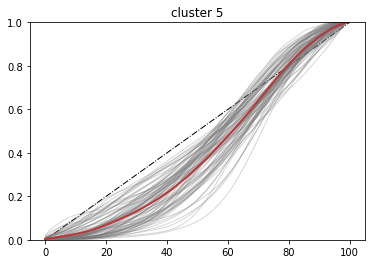

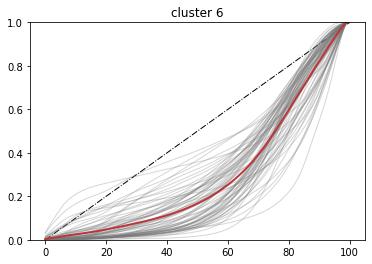

In [86]:
for i in set(clusters):
    plt.figure()
    plt.rc('axes',edgecolor='k')
    avg=[];
    plt.plot(np.linspace(0,100,50),np.linspace(0,1,50),'k-.',linewidth=1)
    for j in age_distrub_filtered[clusters==i,:]:
        plt.ylim([0,1])
        plt.plot(np.cumsum(j),'#79797a',alpha=0.3,linewidth=1);
        avg.append(np.cumsum(j))
    plt.plot(np.mean(avg,0),'#bb3638',linewidth=2)
    plt.title('cluster {}'.format(i))
    


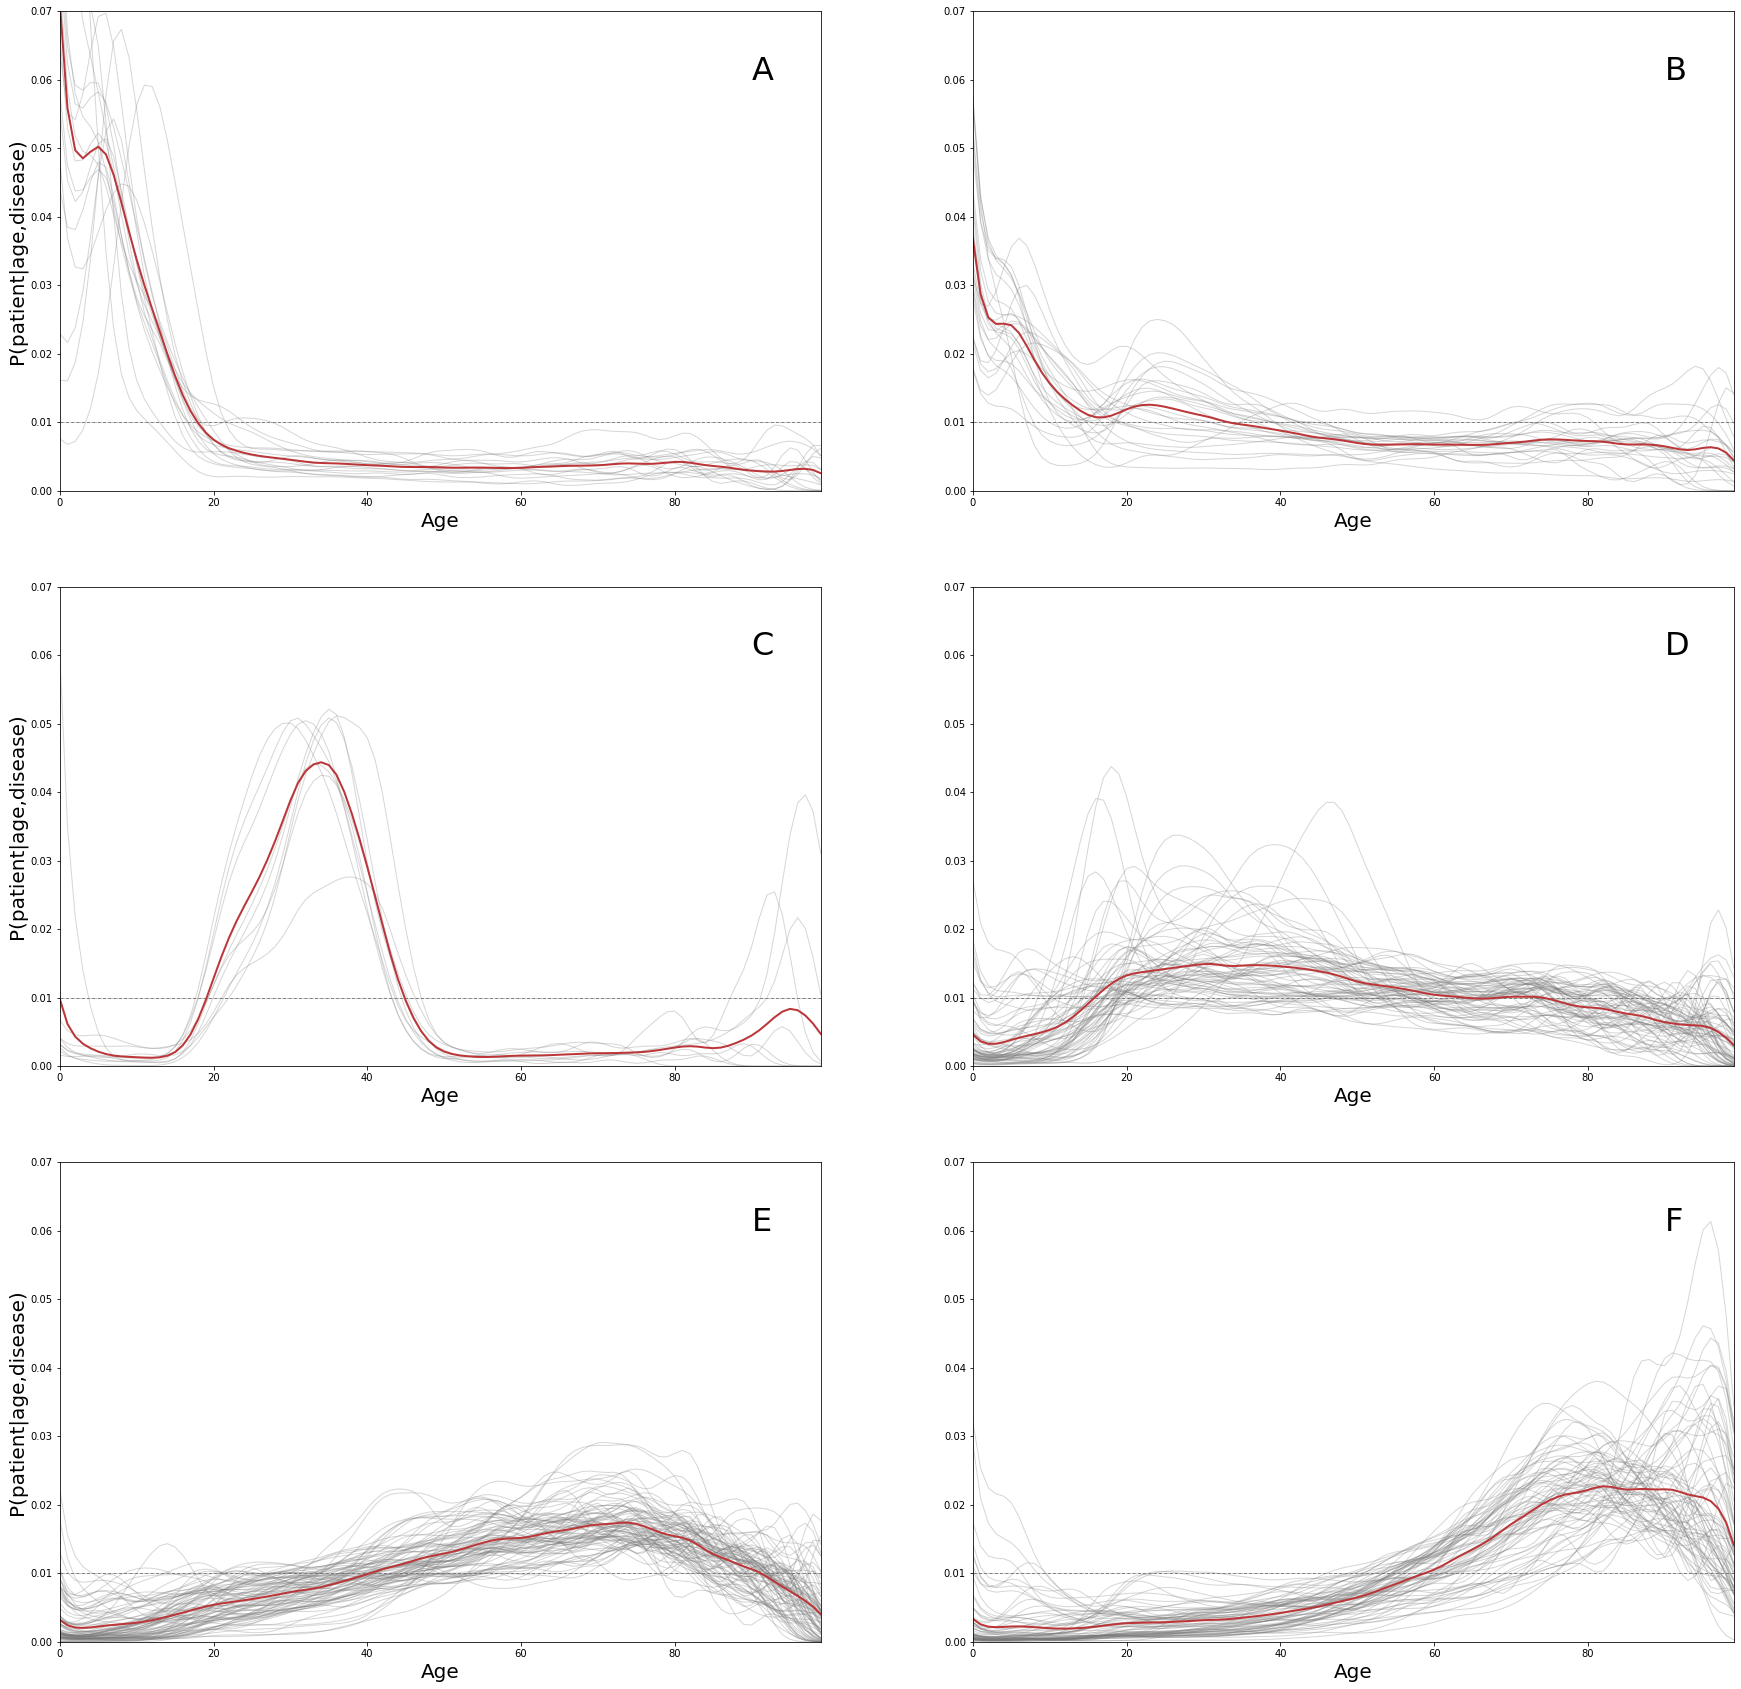

In [87]:
fig = plt.figure(figsize=(30,30))
Letters = ['A','B','C','D','E','F']
#for i in set(clusters):
for i in set(clusters):
    #To order them based on the previous paper
    if i == 2:
        ax = fig.add_subplot(3,2,1)
        letter = Letters[1 - 1]
        ax.set_ylabel('P(patient|age,disease)',fontsize=20)
    elif i == 1:
        ax = fig.add_subplot(3,2,2)
        letter = Letters[2 - 1]
    else:
        
        ax = fig.add_subplot(3,2,i)
        letter = Letters[i - 1]
        if i % 2 != 0:
            ax.set_ylabel('P(patient|age,disease)',fontsize=20)
        
    
    plt.rc('axes',edgecolor='k')
    avg=[];
    ax.plot(np.linspace(0,100,50),np.ones(50)*0.01,'k-.',linewidth=0.5)
    for j in age_distrub_filtered[clusters==i,:]:
        ax.plot(j,'#79797a',alpha=0.3,linewidth=1);
        avg.append(j)
    ax.plot(np.mean(avg,0),'#bb3638',linewidth=2)
    
    
    ax.set_ylim([0,0.07])
    ax.set_xlim([0,99])

    ax.set_xlabel('Age',fontsize=20)
    ax.text(90,0.06,letter,fontsize=32)
    
plt.savefig('Figure10.pdf',dpi=300,bbox_inches='tight')

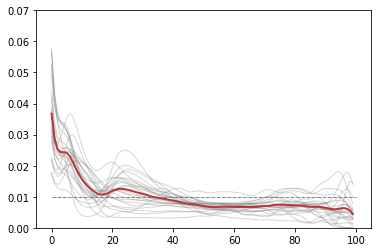

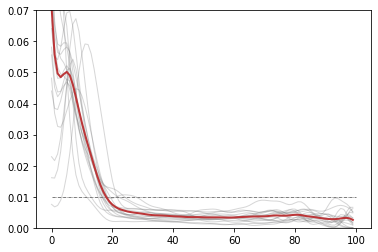

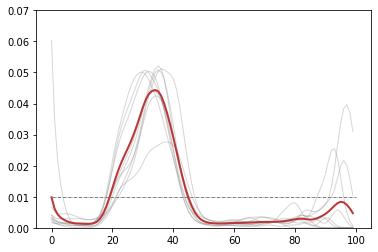

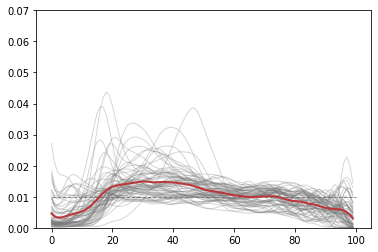

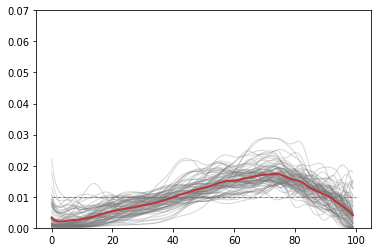

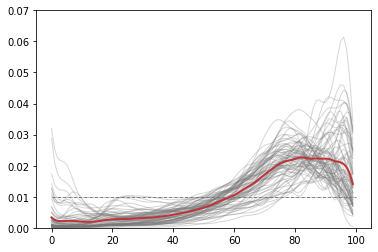

In [88]:
for i in set(clusters):
    plt.figure()
    plt.rc('axes',edgecolor='k')
    avg=[];
    plt.plot(np.linspace(0,100,50),np.ones(50)*0.01,'k-.',linewidth=0.5)
    for j in age_distrub_filtered[clusters==i,:]:
        plt.ylim([0,0.07])
        plt.plot(j,'#79797a',alpha=0.3,linewidth=1);
        avg.append(j)
    plt.plot(np.mean(avg,0),'#bb3638',linewidth=2)


In [89]:
#finally write cluster assignments
file_out=open('cluster_assignments.csv','w')
for i in range(len(clusters)):
    file_out.writelines('{},{}\n'.format(dic_idx_filtered[i],clusters[i]))
file_out.flush()

In [90]:
len(clusters)

278